In [2]:
import pandas as pd
import numpy as np

from main import set_ab_test 
from main import validate_ab_test_data
from main import test_hypothesis_rational
from main import test_hypothesis_continuous
from main import print_statistical_report
from main import save_report_to_html

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
EXPERIMENT_NAME = 'ab_price_discount'

exp_df = pd.DataFrame({
    'user_id': [1, 1, 2, 3, 3, 4, 5, 6],
    'dt': ['2021-01-01', '2021-01-02', '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-02', '2021-01-05', '2021-01-01'],
    'group': [1, 1, 1, 2, 2, 2, 1, 1],
    'payment': [np.nan, 100, np.nan, 110, np.nan, 50, np.nan, 130]
})

In [26]:
exp_df.describe()

,user_id,group,payment
count,8.000000,8.000000,4.000000
mean,3.125000,1.375000,97.500000
std,1.807722,0.517549,34.034296
min,1.000000,1.000000,50.000000
25%,1.750000,1.000000,87.500000
50%,3.000000,1.000000,105.000000
75%,4.250000,2.000000,115.000000
max,6.000000,2.000000,130.000000


In [27]:
set_ab_test(
    ab_test_name=EXPERIMENT_NAME, 
    dataframe=exp_df, 
    group_col='group', 
    date_col='dt', 
    uniq_id_col='user_id',
    control_group_name='A'
)

ab_price_discount

In [28]:
validate_ab_test_data(EXPERIMENT_NAME)

group                   1           2
user_id count    5.000000    3.000000
        mean     3.000000    3.333333
        std      2.345208    0.577350
        min      1.000000    3.000000
        25%      1.000000    3.000000
        50%      2.000000    3.000000
        75%      5.000000    3.500000
        max      6.000000    4.000000
payment count    5.000000    3.000000
        mean    46.000000   53.333333
        std     63.874878   55.075705
        min      0.000000    0.000000
        25%      0.000000   25.000000
        50%      0.000000   50.000000
        75%    100.000000   80.000000
        max    130.000000  110.000000

,group,user_id
0,1,6


'test_hypothesis_rational'

{'ab_price_discount': ab_price_discount}

,group,dt,payment,user_id,metric
0,1,2021-01-01,1.0,1,1.0
1,1,2021-01-02,1.0,1,1.0
2,1,2021-01-05,0.0,1,0.0
3,2,2021-01-02,1.0,1,1.0
4,2,2021-01-03,0.0,1,0.0


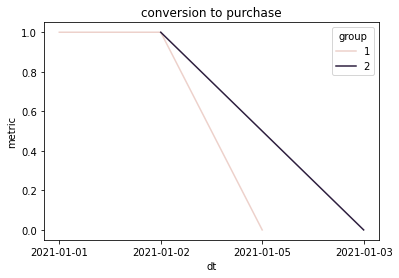

In [30]:
test_hypothesis_rational(
    EXPERIMENT_NAME,
    nominator='payment',
    denominator='user_id',
    stat_test='chisquare', # ztest
    description='conversion to purchase',
    uniq_id_rel=True
)

'test_hypothesis_continuous'

metric
group dt                    
1     2021-01-01   43.333333
      2021-01-02  100.000000
      2021-01-05    0.000000
2     2021-01-02   80.000000
      2021-01-03    0.000000

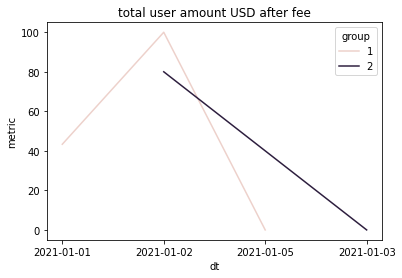

In [36]:
test_hypothesis_continuous(
    EXPERIMENT_NAME,
    value='payment',
    stat_test='ttest_welsh', # ttest, ftest, ztest
    description='total user amount USD after fee'
)

In [30]:
print_statistical_report(EXPERIMENT_NAME)

'print_statistical_report'

In [31]:
save_report_to_html(EXPERIMENT_NAME)

'save_report_to_html'